## Import libraries and functions from other files

In [1]:
from dataloader import *
from model import *
from utils import *
from train import *
from predict import *

## Read Dataset

In [2]:
dataset = VisionDataset(img_dir='vision_img.csv',transform=True)

In [3]:
print('Dataset Shape')
print('Image shape (Channel, Height, Width): {}'.format(dataset[0]['image'].shape))
print('Mask shape (Channel, Height, Width): {}'.format(dataset[0]['label'].shape))
print('Number of classes in the Mask : {}'.format(len(np.unique(dataset[0]['label']))))

Dataset Shape
Image shape (Channel, Height, Width): (12, 64, 64)
Mask shape (Channel, Height, Width): (1, 64, 64)
Number of classes in the Mask : 3


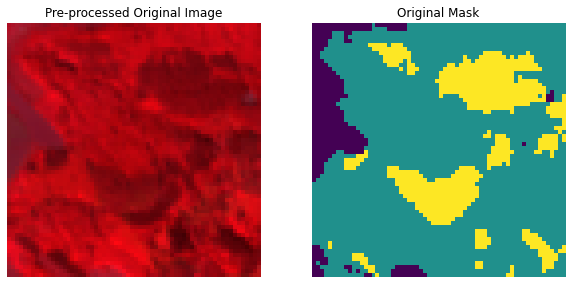

In [4]:
plot_dataset(dataset,1)

## Split Dataset into Training, Validation, and Testing set

In [5]:
train_loader,test_loader,val_loader = create_dataloader(dataset, batch_size=16, shuffle_dataset=True)
print('Train size : {}'.format(len(train_loader)))
print('Validation size : {}'.format(len(val_loader)))
print('Test size : {}'.format(len(test_loader)))

Train size : 228
Validation size : 57
Test size : 72


## Initialize a UNET model

In [6]:
unet = UNET(12,3)
unet

UNET(
  (conv1): Sequential(
    (0): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (conv3): Sequential(
    (0): MaxPool2d(kernel_

## Predicting Mask using Untrained Model

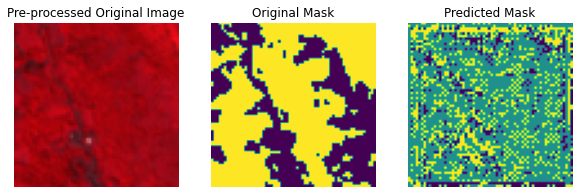

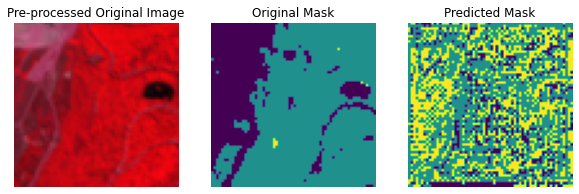

In [8]:
plot_img(train_loader,unet,2)

## Training

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(unet.parameters(), lr=0.01)
train_loss, valid_loss, train_acc, valid_acc = train(unet, train_loader, val_loader, loss_fn, optimizer, acc_metric, epochs = 10)

Training


Epoch: 1/10: 100%|█████████████████████████████████████| 228/228 [01:06<00:00,  3.44batch/s, accuracy=82.1, loss=0.435]


Validation
Validation Loss: 1.1020680665969849  Validation Acc: 0.5942670106887817


Epoch: 2/10: 100%|█████████████████████████████████████| 228/228 [01:12<00:00,  3.15batch/s, accuracy=84.8, loss=0.378]


Validation
Validation Loss: 1.0575793981552124  Validation Acc: 0.6050959825515747


Epoch: 3/10: 100%|█████████████████████████████████████| 228/228 [02:13<00:00,  1.71batch/s, accuracy=84.7, loss=0.368]


Validation
Validation Loss: 0.8717027306556702  Validation Acc: 0.6798915863037109


Epoch: 4/10: 100%|██████████████████████████████████████| 228/228 [02:03<00:00,  1.84batch/s, accuracy=78.6, loss=0.51]


Validation
Validation Loss: 0.9777718782424927  Validation Acc: 0.6717833876609802


Epoch: 5/10: 100%|████████████████████████████████████████| 228/228 [01:54<00:00,  1.99batch/s, accuracy=86, loss=0.35]


Validation
Validation Loss: 1.0339860916137695  Validation Acc: 0.6517195105552673


Epoch: 6/10: 100%|█████████████████████████████████████| 228/228 [01:53<00:00,  2.01batch/s, accuracy=85.9, loss=0.386]


Validation
Validation Loss: 1.1216094493865967  Validation Acc: 0.6103875637054443


Epoch: 7/10: 100%|█████████████████████████████████████| 228/228 [01:46<00:00,  2.13batch/s, accuracy=84.3, loss=0.356]


Validation
Validation Loss: 1.076427698135376  Validation Acc: 0.6351054310798645


Epoch: 8/10: 100%|█████████████████████████████████████| 228/228 [01:43<00:00,  2.21batch/s, accuracy=78.6, loss=0.516]


Validation
Validation Loss: 1.0962966680526733  Validation Acc: 0.6493542194366455


Epoch: 9/10: 100%|█████████████████████████████████████| 228/228 [01:39<00:00,  2.30batch/s, accuracy=83.5, loss=0.374]


Validation
Validation Loss: 0.9514089226722717  Validation Acc: 0.6468110680580139


Epoch: 10/10: 100%|█████████████████████████████████████| 228/228 [01:32<00:00,  2.46batch/s, accuracy=75.9, loss=0.58]


Validation
Validation Loss: 0.7576542496681213  Validation Acc: 0.6948533654212952


In [29]:
train_loss_ = [train_loss[i].cpu().detach().numpy() for i in range(len(train_loss))]
valid_loss_ = [valid_loss[i].cpu().detach().numpy() for i in range(len(valid_loss))]
train_acc_ = [train_acc[i].cpu().detach().numpy() for i in range(len(train_acc))]
valid_acc_ = [valid_acc[i].cpu().detach().numpy() for i in range(len(valid_acc))]

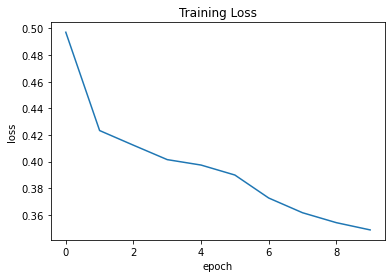

In [38]:
plt.plot(train_loss_)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss')
plt.show()

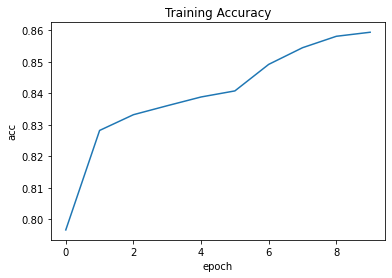

In [40]:
plt.plot(train_acc_)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')
plt.show()

In [10]:
torch.save(unet, 'model_multispectral_new.pth')

## Predicting Mask on Test Images

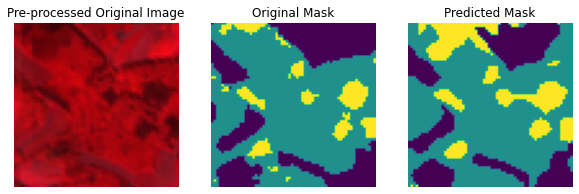

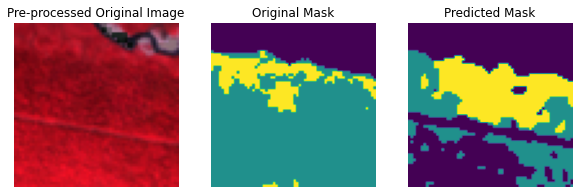

In [42]:
plot_img(test_loader, unet,2)

In [14]:
test_loss, test_acc = calc_acc(test_loader, unet, loss_fn, acc_metric)

In [15]:
print('Testing')
print('='*60)
print('Test loss : {}, Test accuracy : {:.2%}'.format(test_loss,test_acc))
print('\n')

Testing
Test loss : 0.4362696409225464, Test accuracy : 82.83%


